# CA04 Ensemble Methods
## Elizabeth Hyde

**Data Source:** The dataset is from the Census Bureau and includes salaries and seven other demographic variables. The continuous data columns have been transformed into discrete categories. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [0]:
cs = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

**Split Data**

In [0]:
#split training and testing data
x_train = pd.get_dummies(cs[cs['flag']=='train'][['occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin','hours_per_week_bin']])
y_train = cs[cs['flag']=='train']['y']
x_test = pd.get_dummies(cs[cs['flag']=='test'][['occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin','hours_per_week_bin']])
y_test = cs[cs['flag']=='test']['y']

**Find Optimal Hyperparameter Value**

In [0]:
from sklearn.metrics import accuracy_score

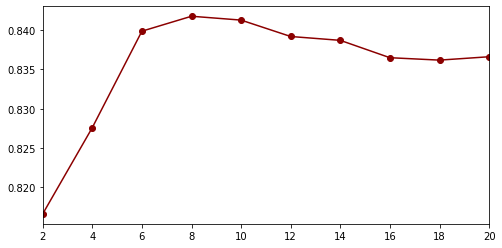

In [0]:
# creates a list of accuracy scores for models with different n_estimator options and plots these values
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth = trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color = "darkred", marker="o")

**Build a Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

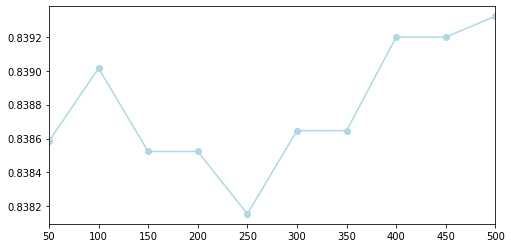

In [0]:
# creates a list of accuracy scores for models with different n_estimator options and plots these values
results_rf1 = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees2 in n_estimator_options:
  model2 = RandomForestClassifier(n_estimators= trees2, random_state=101)
  model2.fit(x_train, y_train)
  y_pred2 = model2.predict(x_test)
  #accuracy2 = np.mean(y_test==y_pred2)
  accuracy2 = accuracy_score(y_test, y_pred2)
  results_rf1.append(accuracy2)

plt.figure(figsize=(8,4))
pd.Series(results_rf1, n_estimator_options).plot(color='lightblue', marker='o')

Of the given trees illustrated by the plot above, the one with 500 estimators performs best overall with a .8394 accuracy score. The worst performing tree has 250 estimators and .8382 accuracy score. However, .0012 is a small difference in accuracy. 

**AdaBoost**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

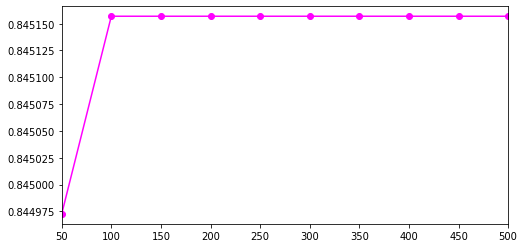

In [0]:
# creates a list of accuracy scores for models with different n_estimator options and plots these values
results_ada = [] 
n_estimator_options_ada = [50,100,150,200,250,300,350,400,450,500]
for trees3 in n_estimator_options_ada:
  model3 = AdaBoostClassifier(n_estimators= trees3, random_state=101)
  model3.fit(x_train, y_train)
  y_pred3 = model3.predict(x_test)
  # accuracy3 = np.mean(y_test==y_pred3)
  accuracy3 = accuracy_score(y_test, y_pred3)
  results_ada.append(accuracy3)

plt.figure(figsize=(8,4))
pd.Series(results_ada, n_estimator_options_ada).plot(color='magenta', marker='o')

**Gradient Boost**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

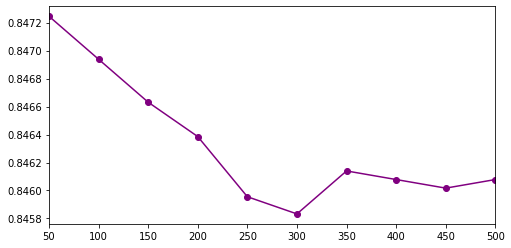

In [0]:
# creates a list of accuracy scores for models with different n_estimator options and plots these values
results_gb = [] 
n_estimator_options_gb = [50,100,150,200,250,300,350,400,450,500]
for trees4 in n_estimator_options_gb:
  model4 = GradientBoostingClassifier(n_estimators= trees4, random_state=101)
  model4.fit(x_train, y_train)
  y_pred4 = model4.predict(x_test)
  #accuracy4 = np.mean(y_test==y_pred4)
  accuracy4 = accuracy_score(y_test, y_pred4)
  results_gb.append(accuracy4)

plt.figure(figsize=(8,4))
pd.Series(results_gb, n_estimator_options_gb).plot(color='purple', marker='o')

**XGB Boost**

In [0]:
import xgboost as xgb
import re

In [0]:
# have to take [,] or > out of column values 
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

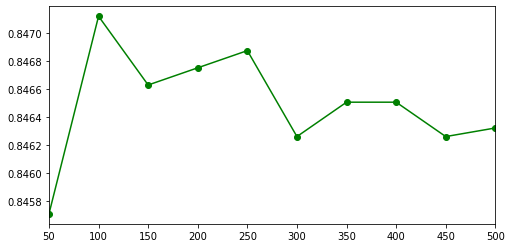

In [0]:
# creates a list of accuracy scores for models with different n_estimator options and plots these values
results_xgb = [] 
n_estimator_options_xgb = [50,100,150,200,250,300,350,400,450,500]
for trees5 in n_estimator_options_xgb:
  model5 = xgb.XGBClassifier(n_estimators=trees5, random_state=101)
  model5.fit(x_train, y_train)
  y_pred5 = model5.predict(x_test)
  #accuracy5 = np.mean(y_test==y_pred5)
  accuracy5 = accuracy_score(y_test, y_pred5)
  results_xgb.append(accuracy5)

plt.figure(figsize=(8,4))
pd.Series(results_xgb, n_estimator_options_xgb).plot(color='green', marker='o')

**Compare Performance**

Assumption: Use number of estimators from optimal model of each type. 

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
output = pd.read_csv('classifier_output.csv')

In [12]:
output.head()

,Unnamed: 0,Random Forest,AdaBoost,Gradient Boost,XGB
0,Accuracy,NaN,NaN,NaN,NaN
1,AUC,NaN,NaN,NaN,NaN


In [0]:
# loop through index to fill values for optimal models of each type - ASSUMPTION: choose optimal n estimator value for each to find best model

for row in output.index:
  # RANDOM FOREST
  model6 = RandomForestClassifier(n_estimators= 500, random_state=101)
  model6.fit(x_train, y_train)
  y_pred6 = model6.predict(x_test)
  accuracy6 = accuracy_score(y_test, y_pred6)
  auc6 = roc_auc_score(y_test, y_pred6)

  output.loc[0,'Random Forest'] = accuracy6
  output.loc[1,'Random Forest'] = auc6

  # ADABOOST
  model7 = AdaBoostClassifier(n_estimators= 100, random_state=101)
  model7.fit(x_train, y_train)
  y_pred7 = model7.predict(x_test)
  accuracy7 = accuracy_score(y_test, y_pred7)
  auc7 = roc_auc_score(y_test, y_pred7)

  output.loc[0, 'AdaBoost'] = accuracy7
  output.loc[1, 'AdaBoost'] = auc7

  # GRADIENT BOOST
  model8 = GradientBoostingClassifier(n_estimators= 50, random_state=101)
  model8.fit(x_train, y_train)
  y_pred8 = model8.predict(x_test)
  accuracy8 = accuracy_score(y_test, y_pred8)
  auc8 = roc_auc_score(y_test, y_pred8)

  output.loc[0, 'Gradient Boost'] = accuracy8
  output.loc[1, 'Gradient Boost'] = auc8

  #XGB
  model9 = xgb.XGBClassifier(n_estimators= 100, random_state=101)
  model9.fit(x_train, y_train)
  y_pred9 = model9.predict(x_test)
  accuracy9 = accuracy_score(y_test, y_pred9)
  auc9 = roc_auc_score(y_test, y_pred9)

  output.loc[0, 'XGB'] = accuracy9
  output.loc[1, 'XGB'] = auc9


In [17]:
output.head()

,Unnamed: 0,Random Forest,AdaBoost,Gradient Boost,XGB
0,Accuracy,0.839322,0.845157,0.847245,0.847122
1,AUC,0.746919,0.746518,0.746269,0.753821
